In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data=pd.read_csv('employee_compensation.csv')
data

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fiscal,2016,1629,100222.50,17166.13,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,Fiscal,2014,35471,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,2016,42176,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,2016,10980,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [3]:
#1. Null value treatment
#2. Outlier treatment
#3. Scaling
#4. Encoding

In [4]:
data.isnull().sum()

Year_Type              0
Year                   0
Employee_Identifier    0
Salaries               0
Overtime               0
Other_Salaries         0
Total_Salary           0
Retirement             0
Health/Dental          0
Other_Benefits         0
Total_Benefits         0
Total_Compensation     0
dtype: int64

In [5]:
data = data.drop('Employee_Identifier',1)
data

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...,...
49995,Fiscal,2016,100222.50,17166.13,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,Fiscal,2014,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,2016,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,2016,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Salaries            50000 non-null  float64
 3   Overtime            50000 non-null  float64
 4   Other_Salaries      50000 non-null  float64
 5   Total_Salary        50000 non-null  float64
 6   Retirement          50000 non-null  float64
 7   Health/Dental       50000 non-null  float64
 8   Other_Benefits      50000 non-null  float64
 9   Total_Benefits      50000 non-null  float64
 10  Total_Compensation  50000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [7]:
data['Year'] = data['Year'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Year                50000 non-null  object 
 2   Salaries            50000 non-null  float64
 3   Overtime            50000 non-null  float64
 4   Other_Salaries      50000 non-null  float64
 5   Total_Salary        50000 non-null  float64
 6   Retirement          50000 non-null  float64
 7   Health/Dental       50000 non-null  float64
 8   Other_Benefits      50000 non-null  float64
 9   Total_Benefits      50000 non-null  float64
 10  Total_Compensation  50000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.2+ MB


In [8]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(exclude=np.number)

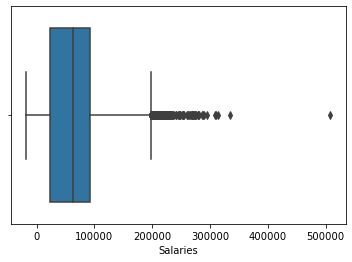

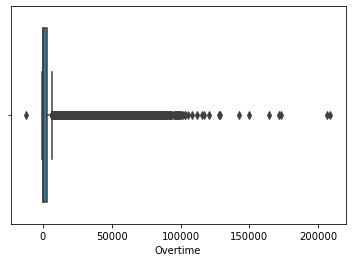

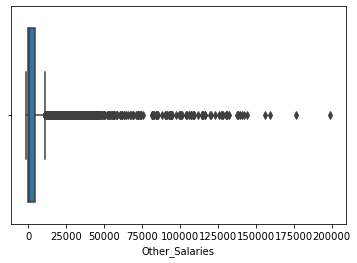

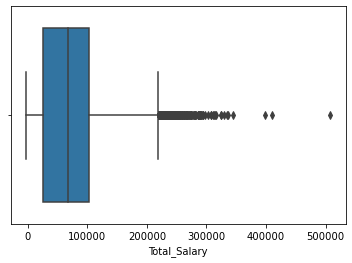

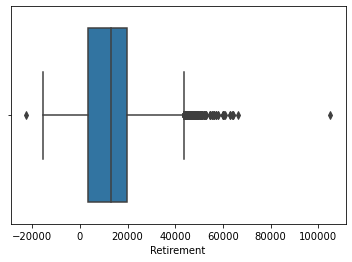

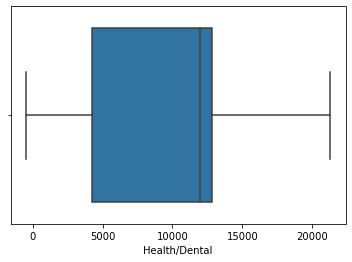

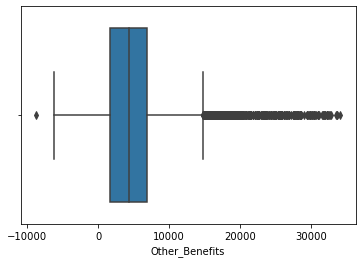

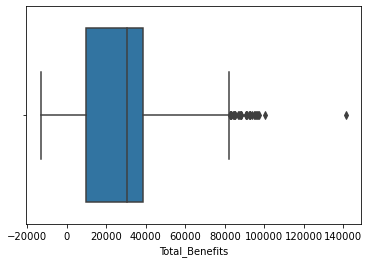

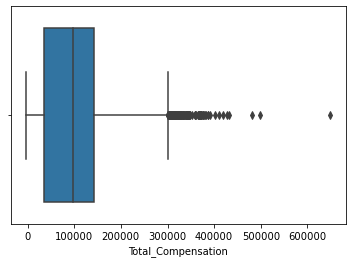

In [9]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [10]:
q1 = num_data.quantile(0.25)
q3 = num_data.quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

In [11]:
data1 = data[~((num_data < lb) | (num_data > ub)).any(axis=1)]
data1.shape

(37721, 11)

In [12]:
data1 = data1.reset_index(drop=True)

In [13]:
data1 = pd.get_dummies(data1,columns=['Year','Year_Type'],drop_first=True)

In [14]:
data1

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,0,1,0,1
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0,1,0,0
2,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1,0,0,1
3,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,0,0,0,1
4,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37716,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57,0,1,0,0
37717,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08,1,0,0,1
37718,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77,0,0,1,1
37719,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43,0,0,1,1


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
data_sc = sc.fit_transform(data1.iloc[:,:-4])
data_sc

array([[ 0.98350096, -0.22809363, -0.47492541, ...,  1.14533041,
         1.16093731,  1.00174074],
       [-1.25228245, -0.16755409, -0.58728422, ..., -1.25998702,
        -1.36520904, -1.30448913],
       [-0.16436027, -0.42853062,  0.09555236, ..., -0.03703952,
        -0.52149093, -0.2693091 ],
       ...,
       [-0.38855074, -0.42853062, -0.58728422, ..., -0.31578482,
        -0.35116039, -0.41025615],
       [-0.13148591, -0.42853062,  4.01005444, ...,  0.21100836,
         0.11622789,  0.09635439],
       [ 0.41682653, -0.42853062,  0.10509729, ...,  0.5806762 ,
         0.69814187,  0.48726629]])

In [17]:
data_sc = pd.DataFrame(data_sc,columns = data1.iloc[:,:-4].columns)
data_sc

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551
...,...,...,...,...,...,...,...,...,...
37716,-1.025886,-0.428531,-0.559586,-1.048704,-1.180545,-0.950223,-1.022303,-1.148664,-1.087236
37717,-1.244380,-0.428531,-0.587284,-1.263887,-1.180545,-1.467262,-1.258772,-1.357355,-1.302770
37718,-0.388551,-0.428531,-0.587284,-0.427243,-0.405315,-0.210662,-0.315785,-0.351160,-0.410256
37719,-0.131486,-0.428531,4.010054,0.087410,-0.173001,0.541960,0.211008,0.116228,0.096354


In [18]:
data_final = pd.concat([data_sc,data1.iloc[:,-4:]],axis=1)
data_final

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741,0,1,0,1
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489,0,1,0,0
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309,1,0,0,1
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591,0,0,0,1
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37716,-1.025886,-0.428531,-0.559586,-1.048704,-1.180545,-0.950223,-1.022303,-1.148664,-1.087236,0,1,0,0
37717,-1.244380,-0.428531,-0.587284,-1.263887,-1.180545,-1.467262,-1.258772,-1.357355,-1.302770,1,0,0,1
37718,-0.388551,-0.428531,-0.587284,-0.427243,-0.405315,-0.210662,-0.315785,-0.351160,-0.410256,0,0,1,1
37719,-0.131486,-0.428531,4.010054,0.087410,-0.173001,0.541960,0.211008,0.116228,0.096354,0,0,1,1


In [19]:
data_final.isnull().sum()

Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
Year_2014             0
Year_2015             0
Year_2016             0
Year_Type_Fiscal      0
dtype: int64

In [20]:
import statsmodels.api as sm

In [21]:
inp = data_final.drop('Total_Compensation',1)
out = data1['Total_Compensation']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.955e+09
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:41:40   Log-Likelihood:            -1.9735e+05
No. Observations:               37721   AIC:                         3.947e+05
Df Residuals:                   37710   BIC:                         3.948e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.663e+04      0.517   1.48e+05      0.000    7.66e+04    7.66e+04
Salaries          5.764e+04   3.56e+13   1.62e-09      1.000   -6.98e+13    6.98e+13
Overtime          1891.6875   1.17e+12   1.62e-09      1.000   -2.29e+12    2.29e+12
Other_Salaries    3375.1250   2.09e+12   1.62e-09      1.000   -4.09e+12    4.09e+12
Total_Salary      -1.74e+04   3.65e+13  -4.77e-10      1.000   -7.14e+13    7.14e+13
Retirement         3.99e+04   3.27e+13   1.22e-09      1.000   -6.41e+13    6.41e+13
Health/Dental     2.283e+04   1.87e+13   1.22e-09      1.000   -3.66e+13    3.66e+13
Other_Benefits    1.413e+04   1.16e+13   1.22e-09      1.000   -2.27e+13    2.27e+13
Total_Benefits    -5.66e+04   5.93e+13  -9.54e-10      1.000   -1.16e+14    1.16e+14
Year_2014         2.512e-11      0.637   3.94e-11      1.000      -1.249       1.249
Year_2015        -1.319e-11      0.636  -2.07e-11      1.000      -1.246       1.246
Year_2016         -2.16e-12      0.791  -2.73e-12      1.000      -1.550       1.550
Year_Type_Fiscal  3.979e-12      0.506   7.86e-12      1.000      -0.992       0.992
==============================================================================
Omnibus:                     4744.753   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7224.288
Skew:                           0.914   Prob(JB):                         0.00
Kurtosis:                       4.120   Cond. No.                     4.44e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['Feature'] = inp.columns
vif.sort_values('VIF',ascending=True)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Feature
0,inf,Salaries
1,inf,Overtime
2,inf,Other_Salaries
3,inf,Total_Salary
4,inf,Retirement
5,inf,Health/Dental
6,inf,Other_Benefits
7,inf,Total_Benefits
8,1.283136,Year_2014
9,1.300030,Year_2015


In [55]:
inpv1 = inp.drop('Salaries',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Feature'] = inpv1.columns
vif = vif.sort_values('VIF',ascending=False)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Feature
3,inf,Retirement
4,inf,Health/Dental
5,inf,Other_Benefits
6,inf,Total_Benefits
2,15.008686,Total_Salary
10,2.065337,Year_Type_Fiscal
9,1.545000,Year_2016
8,1.300030,Year_2015
7,1.283136,Year_2014
1,1.271564,Other_Salaries


In [52]:
inpv2 = inpv1.drop('Retirement',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Feature'] = inpv2.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
5,43.035389,Total_Benefits
2,15.008804,Total_Salary
3,9.417625,Health/Dental
4,6.641277,Other_Benefits
9,2.065337,Year_Type_Fiscal
8,1.545000,Year_2016
7,1.300030,Year_2015
6,1.283136,Year_2014
1,1.271564,Other_Salaries
0,1.159517,Overtime


In [26]:
inpv3 = inpv2.drop('Total_Benefits',axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Feature'] = inpv3.columns
vif.sort_values('VIF',ascending=False)
vif

,VIF,Feature
0,1.159510,Overtime
1,1.257714,Other_Salaries
2,5.851542,Total_Salary
3,3.185484,Health/Dental
4,4.636811,Other_Benefits
5,1.252008,Year_2014
6,1.266620,Year_2015
7,1.535738,Year_2016
8,2.050162,Year_Type_Fiscal


In [27]:
out = data1['Total_Compensation']
inpc = sm.add_constant(inpv3)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.342e+06
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:41:46   Log-Likelihood:            -3.4719e+05
No. Observations:               37721   AIC:                         6.944e+05
Df Residuals:                   37711   BIC:                         6.945e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              7.59e+04     27.188   2791.782      0.000    7.59e+04     7.6e+04
Overtime             1.5956     13.335      0.120      0.905     -24.542      27.733
Other_Salaries    -283.7050     13.888    -20.429      0.000    -310.925    -256.485
Total_Salary       4.89e+04     29.955   1632.492      0.000    4.88e+04     4.9e+04
Health/Dental     6073.4216     22.108    274.722      0.000    6030.090    6116.753
Other_Benefits    3430.4728     26.666    128.648      0.000    3378.207    3482.738
Year_2014         1349.5995     33.117     40.752      0.000    1284.689    1414.510
Year_2015         1369.4921     33.017     41.479      0.000    1304.779    1434.205
Year_2016         -233.1735     41.971     -5.556      0.000    -315.437    -150.910
Year_Type_Fiscal   -40.4212     26.872     -1.504      0.133     -93.091      12.248
==============================================================================
Omnibus:                    23912.661   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1812097.420
Skew:                          -2.274   Prob(JB):                         0.00
Kurtosis:                      36.649   Cond. No.                         7.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

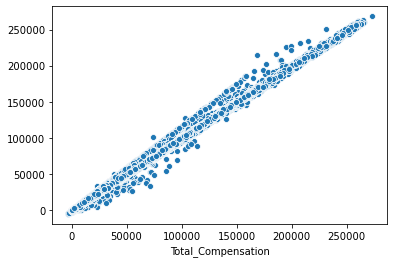

In [28]:
sns.scatterplot(out,ols_mod.predict())

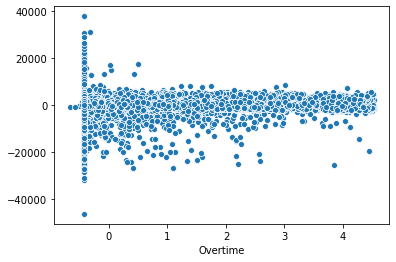

In [29]:
#Linearity
sns.scatterplot(inpv3.iloc[:,0],ols_mod.resid)

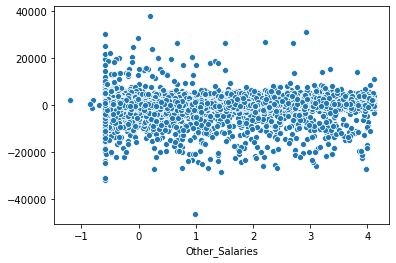

In [30]:
sns.scatterplot(inpv3.iloc[:,1],ols_mod.resid)

In [31]:
from statsmodels.stats.diagnostic import linear_rainbow

In [32]:
#linearity
linear_rainbow(res = ols_mod,frac=0.5)
#H0 : Fraction of the data is linear
#H1 : Fraction of the data is not linear

(0.9963561456138162, 0.5989512641677408)

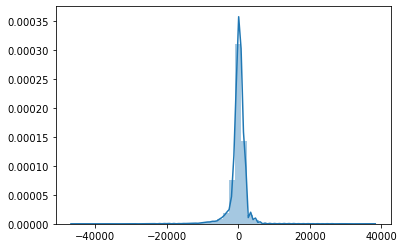

In [33]:
#Normality
sns.distplot(ols_mod.resid)

((array([-4.12701073, -3.91821603, -3.80426286, ...,  3.80426286,
          3.91821603,  4.12701073]),
  array([-146.37020422, -145.68138928, -145.18888223, ...,  223.82375634,
          241.07632847,  262.37026537])),
 (40.88346307177379, 2.6297366370497923e-13, 0.9878288204416016))

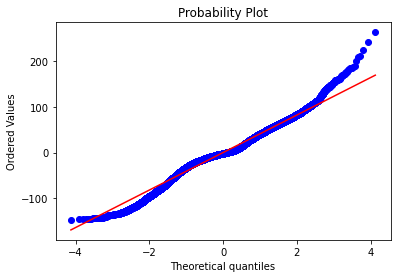

In [64]:
stats.probplot(ols_mod.resid,plot=plt)

In [34]:
ols_mod.resid.skew()

-2.2745761758895284

In [35]:
out.skew()

0.4376635217817136

In [36]:
out.describe()

count     37721.000000
mean      76627.575881
std       56903.754957
min       -3518.340000
25%       21211.800000
50%       80608.920000
75%      115231.110000
max      272895.060000
Name: Total_Compensation, dtype: float64

In [37]:
out1 = abs(out)

In [38]:
out_log = np.log(out1)
out_log.skew()

-1.6922031076943667

In [39]:
out_pow = np.power(out1,0.5)
out_pow.skew()

-0.3095187848510111

In [40]:
out_pow = np.power(out1,0.7)
out_pow.skew()

0.001916029754333152

In [41]:
# Box Cox Transformation
# x --> [(x^lambda) - 1]/lambda if lambda > 0
#       log(x)                  if lambda = 0 

In [42]:
out_box,lam = stats.boxcox(out1)
lam

0.4936545195696519

In [43]:
inpc = sm.add_constant(inpv3)
ols = sm.OLS(out_pow,inpc)
ols_mod = ols.fit()
ols_mod.summary()
ols_mod.resid.skew()

0.4259833748432451

In [44]:
inpc = sm.add_constant(inpv3)
ols = sm.OLS(out_box,inpc)
ols_mod = ols.fit()
ols_mod.summary()
ols_mod.resid.skew()

-0.10236255055833789

In [45]:
# Autocorrealtion -- Durbin watson test (Model should not have autocorrelation)
#0<bw<2 --- Postively auto correlated
#2 --- No autocorrealtion
#>2 to 4 -- then negatively auto correalted

# 1.5 to 2.5 , we can consider as no auto-correaltion
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.175e+05
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:41:51   Log-Likelihood:            -1.9395e+05
No. Observations:               37721   AIC:                         3.879e+05
Df Residuals:                   37711   BIC:                         3.880e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              466.6159      0.468    997.282      0.000     465.699     467.533
Overtime             3.0113      0.229     13.122      0.000       2.562       3.461
Other_Salaries       6.9560      0.239     29.106      0.000       6.488       7.424
Total_Salary       123.1992      0.515    238.993      0.000     122.189     124.210
Health/Dental       76.6330      0.380    201.427      0.000      75.887      77.379
Other_Benefits      29.0732      0.459     63.355      0.000      28.174      29.973
Year_2014            4.3314      0.570      7.600      0.000       3.214       5.448
Year_2015            6.7311      0.568     11.847      0.000       5.617       7.845
Year_2016           -1.7678      0.722     -2.448      0.014      -3.184      -0.352
Year_Type_Fiscal    -1.0443      0.462     -2.258      0.024      -1.951      -0.138
==============================================================================
Omnibus:                     1048.686   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2508.396
Skew:                          -0.102   Prob(JB):                         0.00
Kurtosis:                       4.247   Cond. No.                         7.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

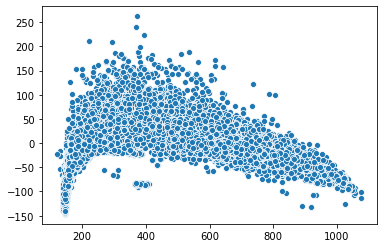

In [46]:
# Homoscadastic --- My model to be homoscasdic
sns.scatterplot(ols_mod.predict(),ols_mod.resid)

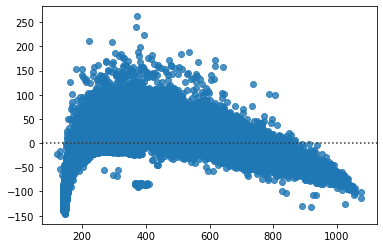

In [47]:
sns.residplot(ols_mod.predict(),ols_mod.resid)

In [48]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)

(1.0133123537421462, 0.18198420401628793, 'increasing')

In [49]:
#H0 : The model is homoscadastic